In [2]:
import pandas as pd
import chess.pgn
import glob 
import os

In [19]:
df=pd.read_csv("../Analyzed_Games/combined_analyzed_games.csv")
df.head(5)

,GameID,WhiteName,WhiteElo,BlackName,BlackElo,WhiteFideId,BlackFideId,Year,Opening,Variation,Result,MoveNumber,Move,Evaluation
0,1.0,"Ragger,M",2624.0,"Wageih,K",2369.0,1610856.0,10604561.0,2023.0,Blumenfeld counter-gambit,Unknown,1-0,1.0,d4,0.24
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Nf6,0.24
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,c4,0.25
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,e6,0.26
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,Nf3,0.23


In [20]:
df.GameID.max()

233222.0

In [21]:

num_unique_gameids = df['GameID'].nunique()
max_gameid = df['GameID'].max()
min_gameid = df['GameID'].min()

print(f"Number of unique GameIDs: {num_unique_gameids}")
print(f"Maximum GameID: {max_gameid}")
print(f"Minimum GameID: {min_gameid}")

Number of unique GameIDs: 232031
Maximum GameID: 233222.0
Minimum GameID: 1.0


In [3]:
df=pd.read_csv("../huge_analyzed_games/combined_analyzed_games.csv")
df.head(5)

C:\Users\foivo\AppData\Local\Temp\ipykernel_29436\3851856207.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("../huge_analyzed_games/combined_analyzed_games.csv")


,GameID,WhiteName,WhiteElo,BlackName,BlackElo,WhiteFideId,BlackFideId,Year,Opening,Variation,Result,MoveNumber,Move,Evaluation
0,1.0,"Niemann,Hans Moke",2687.0,"Duda,J",2740.0,2093596.0,1170546.0,2022.0,King's Indian,3.g3,1-0,1.0,d4,0.26
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Nf6,0.22
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,c4,0.24
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,g6,0.33
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,g3,0.16


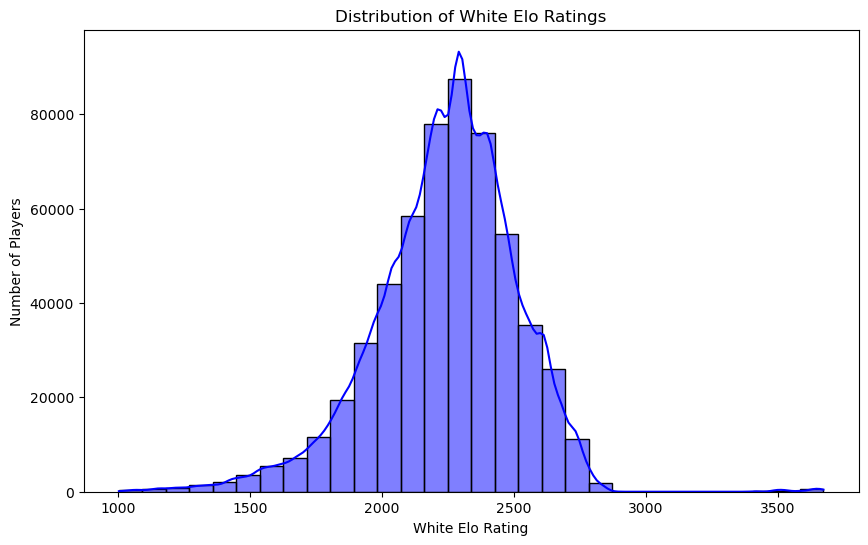

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


# Drop rows with missing 'WhiteElo' values
df_clean = df.dropna(subset=['WhiteElo'])

# Plot the distribution of 'WhiteElo'
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['WhiteElo'], bins=30, kde=True, color='blue')
plt.title('Distribution of White Elo Ratings')
plt.xlabel('White Elo Rating')
plt.ylabel('Number of Players')
plt.show()

In [22]:
elo_range_df = df[(df['WhiteElo'] >= 1500) & (df['WhiteElo'] <= 1900)]
num_games = elo_range_df['GameID'].nunique()
print(num_games)

47461


In [14]:
elo_range_df.head(5)

,GameID,WhiteName,WhiteElo,BlackName,BlackElo,WhiteFideId,BlackFideId,Year,Opening,Variation,Result,MoveNumber,Move,Evaluation
25730297,293566.0,SlowChess Blitz 2.9 avx2,3418.0,Igel 3.5.5,3502.0,NaN,NaN,2023.0,Sicilian,"accelerated fianchetto, modern variation with Bc4",1/2-1/2,1.0,e4,0.39
25730465,293567.0,Ethereal 14.24,3535.0,KomodoDragon 3.2,3587.0,NaN,NaN,2023.0,Sicilian,"dragon, Yugoslav attack, 10.O-O-O",1/2-1/2,1.0,e4,0.31
25730583,293568.0,Stockfish dev-20230903-b25d68f6,3666.0,RubiChess 20230823,3508.0,NaN,NaN,2023.0,Sicilian,"dragon, Yugoslav attack, 9.Bc4",1-0,1.0,e4,0.3
25730745,293569.0,Stoofvlees II b5,3492.0,LCZero 0.31-dag-5107404-T2-5230000,3633.0,NaN,NaN,2023.0,Sicilian,"dragon, Yugoslav attack",1/2-1/2,1.0,e4,0.32
25730845,293570.0,Igel 3.5.5,3502.0,LCZero 0.31-dag-5107404-T2-5230000,3633.0,NaN,NaN,2023.0,King's Indian,"orthodox, Aronin-Taimanov, 9.Ne1",1/2-1/2,1.0,d4,0.3


In [18]:
engine_games=df[(df['WhiteFideId']=='NaN')]
num_engine_games=engine_games['GameID'].nunique()
print(num_engine_games)

0


In [21]:
if 'WhiteFideId' in df.columns:
    # Replace empty strings with NaN (optional, if empty strings are used instead of NaN)
    df['WhiteFideId'] = df['WhiteFideId'].replace('', pd.NA)
    
    # Group by 'GameID' and take the first row of each game
    first_rows = df.groupby('GameID').first().reset_index()
    
    # Filter the games where 'WhiteFideID' is NaN
    missing_fideid_games = first_rows[first_rows['WhiteFideId'].isna()]
    
    # Count the number of such games
    num_games = missing_fideid_games['GameID'].nunique()
    
    print(f"Number of games where WhiteFideID is NaN: {num_games}")
else:
    print("'WhiteFideID' column does not exist in the DataFrame.")

Number of games where WhiteFideID is NaN: 1576


In [28]:
df=pd.read_csv("../Analyzed_Games/example3_analyzed.csv")
df.head(10)

,GameID,WhiteName,WhiteElo,BlackName,BlackElo,Year,Opening,Variation,Average_CPL_White,Average_CPL_Black,MoveNumber,Move,CPL,Evaluation
0,1.0,"Abdusattorov,Nodirbek",2766.0,"Aravindh,Chithambaram VR.",2698.0,2024.0,King's Indian,London system,27.95,28.1,1.0,d4,5.0,0.21
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Nf6,2.0,0.19
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Nf3,0.0,0.21
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,g6,8.0,0.31
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,Bf4,20.0,0.09
5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Bg7,0.0,0.14
6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,c3,1.0,0.1
7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,d6,5.0,0.15
8,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,Nbd2,1.0,0.16
9,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Nh5,6.0,0.0


In [5]:
df=pd.read_csv("../Analyzed_Games/example3_analyzed.csv")
df.head(15)

,GameID,WhiteName,WhiteElo,BlackName,BlackElo,WhiteFideId,BlackFideId,Year,Opening,Variation,Result,MoveNumber,Move,Evaluation
0,1.0,"Abdusattorov,Nodirbek",2766.0,"Aravindh,Chithambaram VR.",2698.0,14204118.0,5072786.0,2024.0,King's Indian,London system,1-0,1.0,d4,0.24
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Nf6,0.24
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Nf3,0.2
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,g6,0.36
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,Bf4,0.1
5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Bg7,0.15
6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,c3,0.16
7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,d6,0.22
8,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,Nbd2,0.09
9,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Nh5,0.04
